# `mammos_mumag` quickstart

`mammos_mumag` can compute hysteresis loops of magnetic materials using finite elements.

Requirements:
- `mammos` and `esys-escript`

In [1]:
import mammos_entity as me
import mammos_units as u
import pandas as pd
from mammos_mumag import hysteresis

In [2]:
u.set_enabled_equivalencies(u.magnetic_flux_field())

## Hysteresis simulation

The `hysteresis.run` function computes a hysteresis loop for a homogeneous material with given parameters. We need to pass in a suitable mesh, `mammos_mumag.mesh` provides a sample mesh.

In [3]:
hysteresis_result = hysteresis.run(
    mesh="cube20_singlegrain_msize2",
    Ms=me.Ms(1280000, unit="A/m"),
    A=me.A(7.7e-12, unit="J/m"),
    K1=me.Ku(4300000, unit="J/m3"),
    theta=0,
    phi=0,
    h_start=(10 * u.T).to("A/m"),
    h_final=(-10 * u.T).to("A/m"),
    h_n_steps=20,
)

## Hysteresis result object

The returned `results_hysteresis` object provides a `plot` method to visualize the computed data. `mammos_mumag.hysteresis` only computes half a hysteresis loop, going from `hstart` to `hfinal`. To show a full loop this function mirrors the computed data and plots it twice:

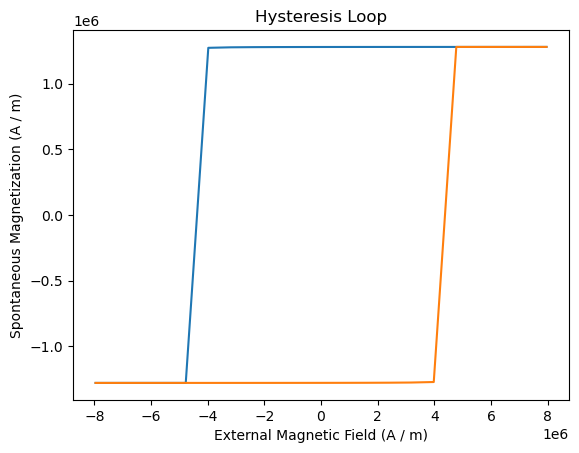

In [4]:
hysteresis_result.plot();

To only see the actual simulation, we can use the flag `duplicate=False`:

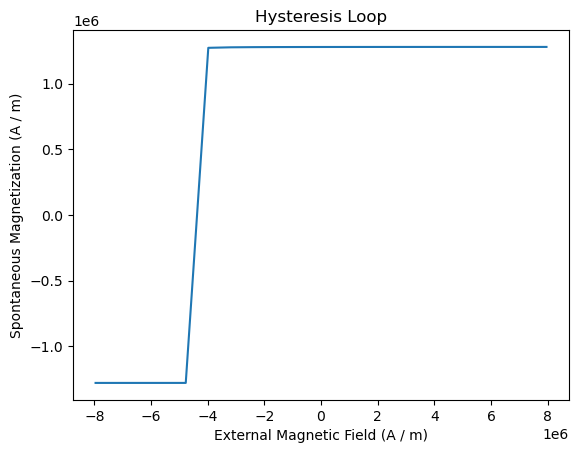

In [5]:
hysteresis_result.plot(duplicate=False);

The results object provides access to:
- the external field `H`
- the magnetization `M` in the direction of the applied field
- the component `Mx`, `My`, `Mz` of the spontaneous magnetization
- the energy density

In [6]:
hysteresis_result.H

Entity(ontology_label='ExternalMagneticField', value=array([ 7957747.15026276,  7161972.43523649,  6366197.72021021,
        5570423.00518393,  4774648.29015766,  3978873.57513138,
        3183098.86010511,  2387324.14507883,  1591549.43005255,
         795774.71502628,        0.        ,  -795774.71502628,
       -1591549.43005255, -2387324.14507883, -3183098.86010511,
       -3978873.57513138, -4774648.29015766, -5570423.00518393,
       -6366197.72021021, -7161972.43523649, -7957747.15026276]), unit='A / m')

In [7]:
hysteresis_result.M

Entity(ontology_label='SpontaneousMagnetization', value=array([ 1279889.28858392,  1279875.35487467,  1279858.60865277,
        1279838.23693916,  1279813.10960708,  1279781.61816143,
        1279741.40923658,  1279688.9282623 ,  1279618.59692456,
        1279521.24777537,  1279380.92895796,  1279167.79124963,
        1278820.31896709,  1278193.40901814,  1276865.45558215,
        1273023.46966246, -1279813.11387701, -1279838.23510354,
       -1279858.60560256, -1279875.35242235, -1279889.28868812]), unit='A / m')

In [8]:
hysteresis_result.Mx

Entity(ontology_label='SpontaneousMagnetization', value=array([ 1.33369419e+04,  1.27642912e+04,  1.21138305e+04,  1.13685440e+04,
        1.05060693e+04,  9.49642262e+03,  8.29840374e+03,  6.85388865e+03,
        5.07807497e+03,  2.84220258e+03, -5.92135651e+01, -3.97555587e+03,
       -9.55402102e+03, -1.81446442e+04, -3.31351859e+04, -6.65045268e+04,
       -1.05064987e+04, -1.13683458e+04, -1.21134459e+04, -1.27639874e+04,
       -1.33368784e+04]), unit='A / m')

In [9]:
hysteresis_result.My

Entity(ontology_label='SpontaneousMagnetization', value=array([ -48.88653309,  -51.96927457,  -55.4673908 ,  -59.47103443,
        -64.09846682,  -69.5089531 ,  -75.91814415,  -83.63248719,
        -93.09714579, -104.98673227, -120.37569967, -141.08903498,
       -170.50557468, -215.70060297, -294.72360668, -476.0020296 ,
         64.14680914,   59.35556978,   55.25696228,   51.80783763,
         48.92009087]), unit='A / m')

In [10]:
hysteresis_result.Mz

Entity(ontology_label='SpontaneousMagnetization', value=array([ 1279851.43397906,  1279847.49250133,  1279842.09608478,
        1279834.72859929,  1279824.6500327 ,  1279810.77494583,
        1279791.46867247,  1279764.19052806,  1279724.84138717,
        1279666.49962956,  1279576.79725706,  1279431.97819965,
        1279181.81279555,  1278704.73773844,  1277638.20888423,
        1274378.02605554, -1279824.64680899, -1279834.73022376,
       -1279842.09974628, -1279847.4953512 , -1279851.43519197]), unit='A / m')

In [11]:
hysteresis_result.energy_density

Entity(ontology_label='EnergyDensity', value=array([-16793259.14717998, -15513376.61777121, -14233509.37078527,
       -12953660.60369528, -11673834.47507029, -10394036.49593287,
        -9114274.12985359,  -7834557.74471192,  -6554902.1835602 ,
        -5275329.48376666,  -3995873.86584996,  -2716591.57883736,
        -1437582.25793929,   -159041.64107598,   1118580.91577263,
         2393925.95515716, -11673834.47506085, -12953660.60369348,
       -14233509.37077219, -15513376.61776414, -16793259.14717655]), unit='J / m3')

The attribute `configuration_type` contains a list of indices that refer to saved magnetization field configurations. We will use this information later.

In [12]:
hysteresis_result.configuration_type

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

We can also get the hysteresis data as a pandas dataframe in SI units:

In [13]:
hysteresis_result.dataframe

,configuration_type,H,M,Mx,My,Mz,energy_density
0,1,7.957747e+06,1.279889e+06,13336.941917,-48.886533,1.279851e+06,-1.679326e+07
1,1,7.161972e+06,1.279875e+06,12764.291238,-51.969275,1.279847e+06,-1.551338e+07
2,1,6.366198e+06,1.279859e+06,12113.830536,-55.467391,1.279842e+06,-1.423351e+07
3,1,5.570423e+06,1.279838e+06,11368.544042,-59.471034,1.279835e+06,-1.295366e+07
4,1,4.774648e+06,1.279813e+06,10506.069334,-64.098467,1.279825e+06,-1.167383e+07
5,1,3.978874e+06,1.279782e+06,9496.422618,-69.508953,1.279811e+06,-1.039404e+07
6,1,3.183099e+06,1.279741e+06,8298.403739,-75.918144,1.279791e+06,-9.114274e+06
7,1,2.387324e+06,1.279689e+06,6853.888646,-83.632487,1.279764e+06,-7.834558e+06
8,1,1.591549e+06,1.279619e+06,5078.074971,-93.097146,1.279725e+06,-6.554902e+06
9,1,7.957747e+05,1.279521e+06,2842.202583,-104.986732,1.279666e+06,-5.275329e+06


We can generate a table in alternate units:

In [14]:
df = pd.DataFrame(
    {
        "mu0_H": hysteresis_result.H.q.to(u.T),
        "J": hysteresis_result.M.q.to(u.T),
    },
)
df.head()

,mu0_H,J
0,10.0,1.608356
1,9.0,1.608339
2,8.0,1.608318
3,7.0,1.608292
4,6.0,1.608261


## Visualizing magnetization configurations

To plot the hysteresis loop (including the available configurations), run

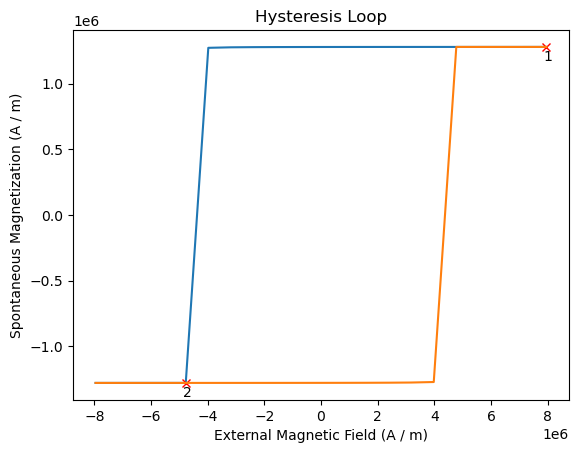

In [15]:
hysteresis_result.plot(configuration_marks=True);

We can get the location of the saved configurations from the attribute `configurations`:

In [16]:
hysteresis_result.configurations

{1: PosixPath('/home/petrocch/repo/mammos/mammos-mumag/examples/hystloop/hystloop_0001.vtu'),
 2: PosixPath('/home/petrocch/repo/mammos/mammos-mumag/examples/hystloop/hystloop_0002.vtu')}

To inspect the configurations more conveniently directly in the notebook we can use the `plot_configuration` function of `hysteresis_result`. We need to pass the index and get an interactive 3D plot (using pyvista):

In [17]:
hysteresis_result.plot_configuration(1)

Widget(value='<iframe src="http://localhost:38093/index.html?ui=P_0x7f9b313a3450_0&reconnect=auto" class="pyvi…

 JS Error => TypeError: `target` argument of Proxy must be an object, got null


Note: the small object size is a consequence of the empty sphere around the cube.